In [75]:
import os
import numpy as np
from hmmlearn import hmm
from p1_uml_util import *
import matplotlib.pyplot as plt

def prepare_data():
    #script_path = os.path.dirname(os.path.abspath(__file__))
    script_path = os.path.abspath('')
    data_path = os.path.join(script_path, "data")
    file_path = os.path.join(data_path, "data.csv")
    _df = read_csv_file(file_path)
    _df.set_index(lb_timestamp, inplace=True)
    print(_df.dtypes)
    return _df

def plot_data(_df: pd.DataFrame, lb1, lb2, legend):
    import matplotlib.pyplot as plt
    df_to_plot = _df.tail(1000)
    plt.plot(df_to_plot.index, df_to_plot[lb1], label=alias[lb_V005_vent01_CO2])
    plt.plot(df_to_plot.index, df_to_plot[lb2], label=alias[lb_V022_vent02_CO2])
    plt.xlabel(lb_timestamp)
    plt.ylabel(legend)
    plt.legend()
    plt.show()

def simple_hmm_example():
    # Define the HMM parameters
    n_components = 2  # Number of hidden states
    # n_features is 24, for each hour of the day
    n_features = 4  # Number of features (dimensionality of the observation space)

    # Generate some example training data
    np.random.seed(42)
    # replace this with real data
    observed_data = np.random.randn(100, n_features)

    # Create a Gaussian HMM model
    model = hmm.GaussianHMM(n_components=n_components, covariance_type="full", n_iter=100)

    # Fit the model to the observed data
    model.fit(observed_data)

    # Print the learned parameters
    print("Transition matrix:\n", model.transmat_)
    print("Means:\n", model.means_)
    print("Covariances:\n", model.covars_)
    print("Start probabilities:\n", model.startprob_)

    # Now let's decode a new sequence of observations
    # use the same observations that were used in the training (line 35)
    new_observations = np.random.randn(10, n_features)

    # Decode the sequence of observations, i.e. find the most likely sequence of hidden states
    # this should help you to group the observations in different states
    decoded_states = model.predict(new_observations)

    # Print the decoded states
    print("Decoded states:", decoded_states)

In [4]:

if __name__ == "__main__":
    #df = prepare_data()
    #plot_data(df, lb_V005_vent01_CO2, lb_V022_vent02_CO2, "CO2")
    #plot_data(df, lb_V006_vent01_temp_out, lb_V023_vent02_temp_out, "Temperature")
    simple_hmm_example()

c:\Users\Diego\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Transition matrix:
 [[0.27384628 0.72615372]
 [0.2926973  0.7073027 ]]
Means:
 [[ 0.51314076  0.36275154 -0.78679647  0.53385313]
 [-0.22783203 -0.10341803  0.35989288 -0.1605559 ]]
Covariances:
 [[[ 0.61845754 -0.04462524  0.20011712  0.06392295]
  [-0.04462524  1.64988402  0.21838799  0.19570729]
  [ 0.20011712  0.21838799  0.96806806  0.48912218]
  [ 0.06392295  0.19570729  0.48912218  0.76876765]]

 [[ 0.63790994 -0.10175098  0.18941375 -0.20167596]
  [-0.10175098  0.52042757  0.0195697   0.00300033]
  [ 0.18941375  0.0195697   0.738734   -0.0241042 ]
  [-0.20167596  0.00300033 -0.0241042   0.89125117]]]
Start probabilities:
 [9.99999999e-01 7.53130368e-10]
Decoded states: [0 0 1 1 1 1 0 1 1 1]


In [11]:
df = prepare_data()

V005_vent01_CO2         float64
V022_vent02_CO2         float64
V006_vent01_temp_out    float64
V023_vent02_temp_out    float64
dtype: object


In [14]:
df.columns

Index(['V005_vent01_CO2', 'V022_vent02_CO2', 'V006_vent01_temp_out',
       'V023_vent02_temp_out'],
      dtype='object')

In [17]:
alias["V022_vent02_CO2"]

'CO2 Ventilation SW'

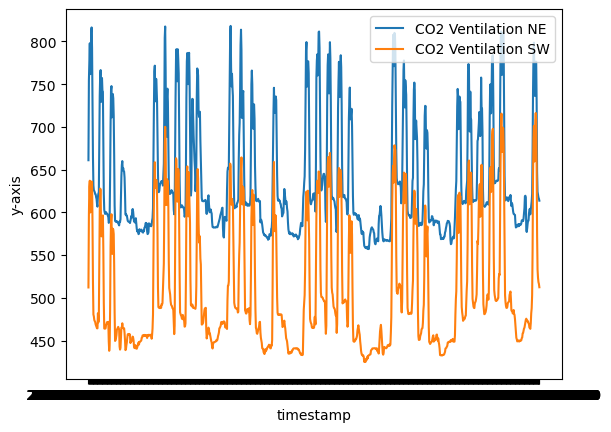

In [18]:
plot_data(df, lb1="V005_vent01_CO2", lb2="V022_vent02_CO2", legend="y-axis")

In [93]:
def simul_hmm(n_sample = 24, plot_name = "test", title = ""):
    model = hmm.GaussianHMM(n_components=4, init_params="")
    model.n_features = 2
    model.startprob_ = np.array([1/4., 1/4., 1/4., 1/4.])
    model.transmat_ = np.array([[0.3, 0.4, 0.2, 0.1],
                                [0.1, 0.2, 0.3, 0.4],
                                [0.5, 0.2, 0.1, 0.2],
                                [0.25, 0.25, 0.25, 0.25]])
    model.means_ = np.array([[-2.5], [0], [2.5], [5.]])
    model.covars_ = np.sqrt([[0.25], [0.25], [0.25], [0.25]])


    X, y = model.sample(n_sample, random_state=1)

    aic = []
    bic = []
    lls = []
    ns = range(2,11)
    for n in ns:
        best_ll = None
        best_model = None
        for i in range(10):
            h = hmm.GaussianHMM(n, n_iter=200, tol=1e-4, random_state=i)
            h.fit(X)
            score = h.score(X)
            if not best_ll or best_ll < best_ll:
                best_ll = score
                best_model = h
        aic.append(best_model.aic(X))
        bic.append(best_model.bic(X))
        lls.append(best_model.score(X))

    fig, ax = plt.subplots()
    ln1 = ax.plot(ns, aic, label="AIC", color="black", marker="o")
    ln2 = ax.plot(ns, bic, label="BIC", color="darkblue", marker="o")
    ax2 = ax.twinx()
    ln3 = ax2.plot(ns, lls, label="LL", color="darkred", marker="o")

    ax.legend(handles=ax.lines + ax2.lines)
    ax.set_title("Using AIC/BIC for Model Selection: " + title)
    ax.set_ylabel("Criterion Value (lower is better)")
    ax2.set_ylabel("LL (higher is better)")
    ax.set_xlabel("Number of HMM Components")
    fig.tight_layout()

    plt.savefig("./results/" + plot_name + ".png")
    plt.close()

simul_hmm(n_sample = 24, plot_name = "hmm_simul_24n_1x", title = "24 muestras, 1 feature")
simul_hmm(n_sample = 100, plot_name = "hmm_simul_100n_1x", title = "100 muestras, 1 feature")
simul_hmm(n_sample = 300, plot_name = "hmm_simul_300n_1x", title = "300 muestras, 1 feature")
simul_hmm(n_sample = 1000, plot_name = "hmm_simul_1000n_1x", title = "1000 muestras, 1 feature")

c:\Users\Diego\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Diego\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Diego\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Diego\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Wi

In [98]:
from sklearn.cluster import KMeans

In [106]:
def simul_kmeans_selection(n_sample = 24, plot_name = "test", title = ""):
    model = hmm.GaussianHMM(n_components=4, init_params="")
    model.n_features = 2
    model.startprob_ = np.array([1/4., 1/4., 1/4., 1/4.])
    model.transmat_ = np.array([[0.3, 0.4, 0.2, 0.1],
                                [0.1, 0.2, 0.3, 0.4],
                                [0.5, 0.2, 0.1, 0.2],
                                [0.25, 0.25, 0.25, 0.25]])
    model.means_ = np.array([[-2.5], [0], [2.5], [5.]])
    model.covars_ = np.sqrt([[0.25], [0.25], [0.25], [0.25]])


    X, y = model.sample(n_sample, random_state=1)

    inertias = []
    for k in range(1, 10 + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 10 + 1), inertias, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal K:' + title)
    plt.xticks(range(1, 10 + 1))
    plt.grid(True)
    plt.savefig("./results/" + plot_name + ".png")
    plt.close()


simul_kmeans_selection(n_sample = 24, plot_name = "kmeans_simul_24n_1x", title = "24 muestras, 1 feature")
simul_kmeans_selection(n_sample = 100, plot_name = "kmeans_simul_100n_1x", title = "100 muestras, 1 feature")
simul_kmeans_selection(n_sample = 300, plot_name = "kmeans_simul_300n_1x", title = "300 muestras, 1 feature")
simul_kmeans_selection(n_sample = 1000, plot_name = "kmeans_simul_1000n_1x", title = "1000 muestras, 1 feature")

c:\Users\Diego\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Diego\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Diego\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Diego\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there